In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
dataset_path = "/content/drive/MyDrive/OTDR/OTDR_data.csv"
df = pd.read_csv(dataset_path)
df.head()

,Unnamed: 0,SNR,P1,P2,P3,P4,P5,P6,P7,P8,...,P25,P26,P27,P28,P29,P30,Class,Position,Reflectance,loss
0,70519,10.093627,0.989995,0.769634,0.866942,1.000000,0.838370,0.795462,0.801609,0.763259,...,0.345600,0.114946,0.000000,0.381516,0.099061,0.280784,1.0,0.08,0.0,0.112
1,81009,0.219347,0.341150,0.484929,0.689960,0.924820,0.648481,0.196055,0.886128,1.000000,...,0.384524,0.992029,0.488258,0.402361,0.321495,0.679280,3.0,0.11,0.0,0.400
2,62575,9.282432,0.438344,0.981339,0.728630,0.485106,0.359851,0.184697,0.222956,0.437243,...,0.910126,0.964232,0.637623,0.162285,0.138643,0.723457,0.0,0.00,0.0,0.000
3,70401,8.803449,0.674877,0.638932,0.651814,0.716335,0.475147,0.628348,0.626998,0.691957,...,0.411247,0.097255,0.210350,0.263302,0.132508,0.000000,1.0,0.09,0.0,0.100
4,7550,16.485467,0.767071,0.517559,0.115700,0.000000,0.055019,0.258061,0.115876,0.392273,...,0.457824,0.864551,0.704364,0.508301,0.433237,0.028219,0.0,0.00,0.0,0.000


In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
SNR,0
P1,0
P2,0
P3,0
P4,0
P5,0
P6,0
P7,0
P8,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125832 entries, 0 to 125831
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   125832 non-null  int64  
 1   SNR          125832 non-null  float64
 2   P1           125832 non-null  float64
 3   P2           125832 non-null  float64
 4   P3           125832 non-null  float64
 5   P4           125832 non-null  float64
 6   P5           125832 non-null  float64
 7   P6           125832 non-null  float64
 8   P7           125832 non-null  float64
 9   P8           125832 non-null  float64
 10  P9           125832 non-null  float64
 11  P10          125832 non-null  float64
 12  P11          125832 non-null  float64
 13  P12          125832 non-null  float64
 14  P13          125832 non-null  float64
 15  P14          125832 non-null  float64
 16  P15          125832 non-null  float64
 17  P16          125832 non-null  float64
 18  P17          125832 non-

In [5]:
df.describe()

,Unnamed: 0,SNR,P1,P2,P3,P4,P5,P6,P7,P8,...,P25,P26,P27,P28,P29,P30,Class,Position,Reflectance,loss
count,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,...,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000,125832.000000
mean,62915.500000,12.315957,0.383666,0.379560,0.377179,0.375738,0.376254,0.382815,0.390346,0.399960,...,0.476285,0.456533,0.437593,0.420615,0.402363,0.389017,3.471216,0.059272,-0.070685,0.222031
std,36324.713874,9.202129,0.343306,0.338766,0.336568,0.332489,0.326922,0.324796,0.319550,0.315327,...,0.296303,0.296518,0.294765,0.293194,0.295106,0.306531,2.302075,0.043066,0.092539,0.271161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000
25%,31457.750000,3.000000,0.041760,0.038821,0.036689,0.040424,0.051494,0.061802,0.079696,0.090327,...,0.233595,0.215426,0.203007,0.192505,0.169732,0.144702,1.000000,0.030000,-0.130000,0.000000
50%,62915.500000,13.000000,0.320210,0.315812,0.310499,0.308350,0.313471,0.333092,0.351876,0.372897,...,0.441615,0.416618,0.391529,0.366709,0.347401,0.332184,3.000000,0.060000,0.000000,0.092000
75%,94373.250000,20.106899,0.690142,0.685213,0.681227,0.669226,0.660253,0.662213,0.658540,0.664620,...,0.714035,0.683525,0.656642,0.635709,0.617000,0.609878,6.000000,0.090000,0.000000,0.400000
max,125831.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,0.200000,0.000000,1.000000


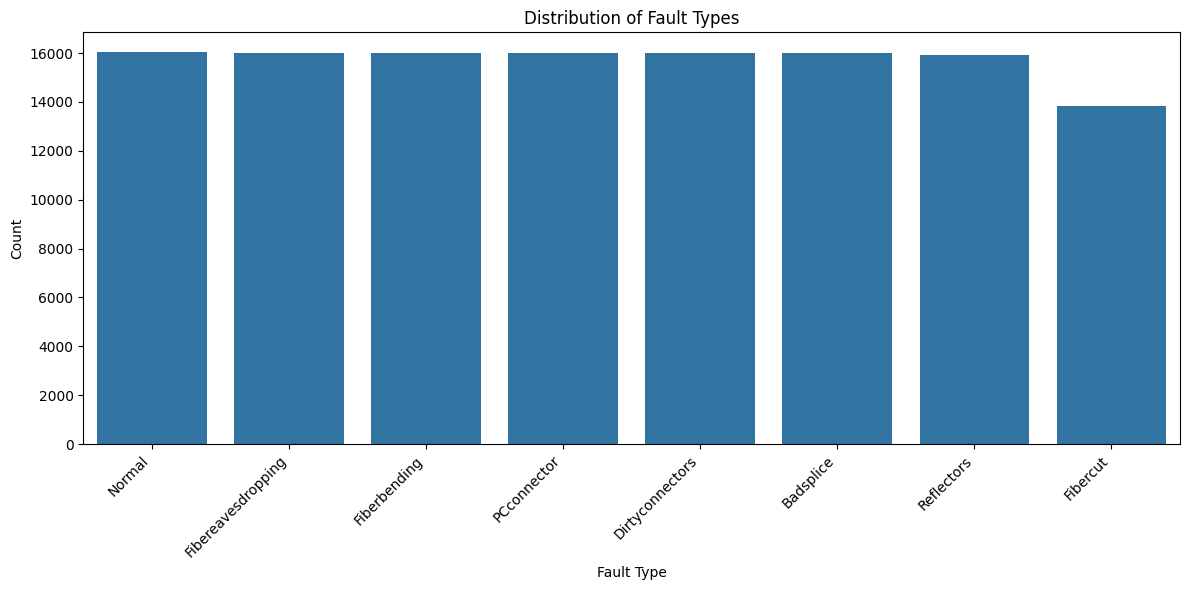

In [17]:

# Map the class numbers to labels for plotting
df['Faulttype'] = df['Class'].map(class_labels)

plt.figure(figsize=(12, 6))
sns.countplot(x='Faulttype', data=df, order=df['Faulttype'].value_counts().index)
plt.title('Distribution of Fault Types')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [7]:
noise_factor = 10.467
noise = noise_factor * np.random.normal(size=X.shape)
X_noisy = X + noise

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential()

model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(len(np.unique(y)), activation='softmax'))


optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/20
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.2034 - loss: 2.3564 - val_accuracy: 0.4993 - val_loss: 1.3131
Epoch 2/20
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4308 - loss: 1.3859 - val_accuracy: 0.7528 - val_loss: 0.6835
Epoch 3/20
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5579 - loss: 1.0306 - val_accuracy: 0.8439 - val_loss: 0.5327
Epoch 4/20
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6300 - loss: 0.8577 - val_accuracy: 0.8927 - val_loss: 0.4294
Epoch 5/20
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6661 - loss: 0.7747 - val_accuracy: 0.8705 - val_loss: 0.4110
Epoch 6/20
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6960 - loss: 0.7123 - val_accuracy: 0.9071 - val_loss: 0.3652
Epoch 7/20
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7102 - loss: 0.6812 - val_accuracy: 0.9106 - val_loss: 0.3416
Epoch 8/20
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7252 - loss: 0.6518 

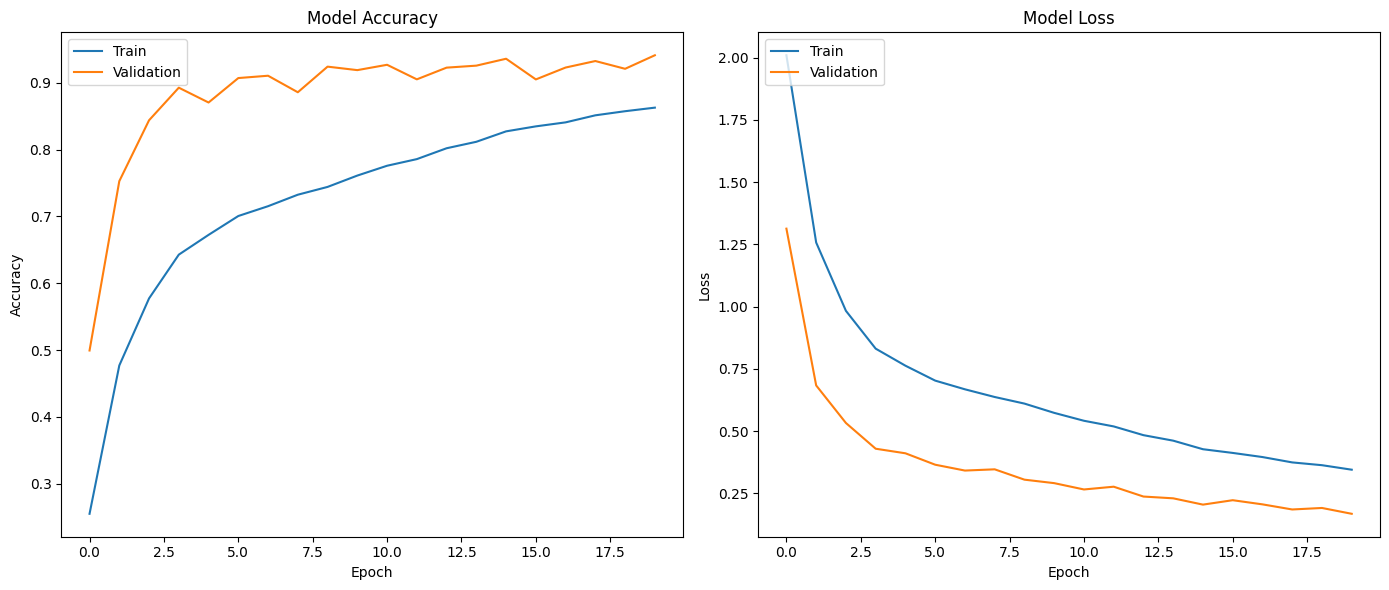

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/OTDR/AUC vs Loss.pdf', dpi=1000, format='pdf')
plt.show()


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
mlp_pred = model.predict(X_test)

mlp_pred = np.argmax(mlp_pred, axis=1)

print("Accuracy:", accuracy_score(mlp_pred, y_test))
print("Precision:", precision_score(mlp_pred, y_test, average='macro'))
print("Recall:", recall_score(mlp_pred, y_test, average='macro'))
print("F1-Score:", f1_score(mlp_pred, y_test, average='macro'))

787/787 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy: 0.9391266340843167
Precision: 0.938631450576982
Recall: 0.9398917753166949
F1-Score: 0.9389575158653465


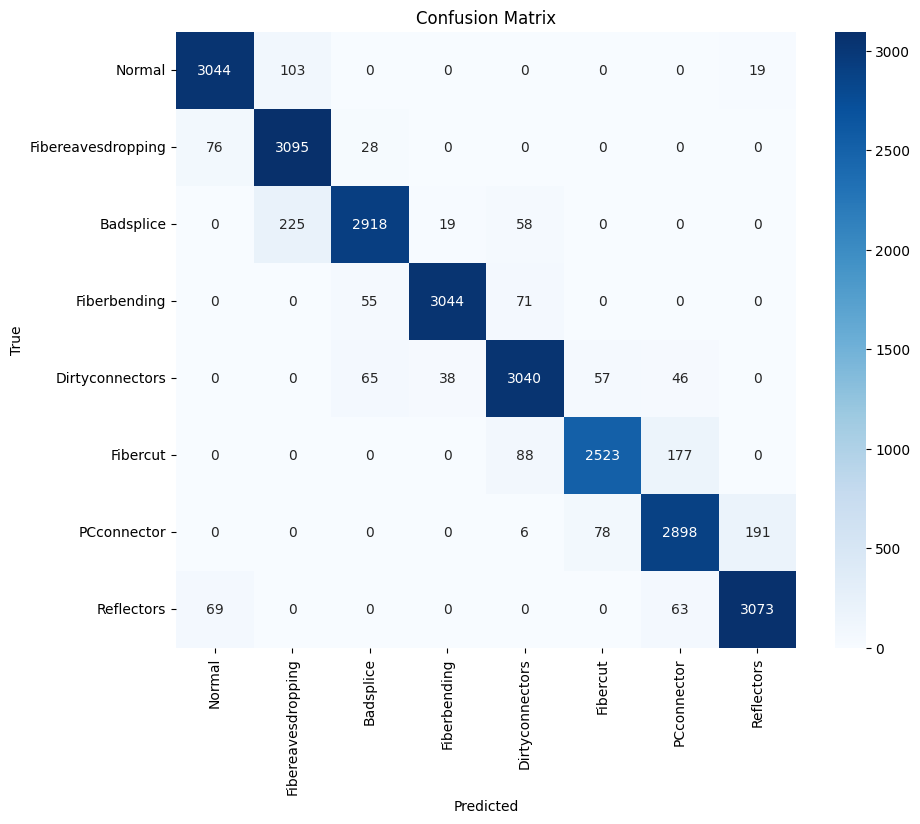

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, mlp_pred)

# Define the class labels
class_labels = {
    0: 'Normal',
    1: 'Fibereavesdropping',
    2: 'Badsplice',
    3: 'Fiberbending',
    4: 'Dirtyconnectors',
    5: 'Fibercut',
    6: 'PCconnector',
    7: 'Reflectors'
}
# Get the sorted unique class values from y_test
sorted_classes = sorted(np.unique(y_test))

# Create labels in the correct order
tick_labels = [class_labels[i] for i in sorted_classes]


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=tick_labels, yticklabels=tick_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.savefig('/content/drive/MyDrive/OTDR/CM.pdf', dpi=1000, format='pdf')
plt.show()

In [15]:
# Classification Report
from sklearn.metrics import classification_report
import numpy as np

# Get the sorted unique class values from y_test
sorted_classes = sorted(np.unique(y_test))

# Create labels in the correct order for the report
report_labels = [class_labels[i] for i in sorted_classes]

print("\nClassification Report:")
print(classification_report(y_test, mlp_pred, target_names=report_labels))


Classification Report:
                    precision    recall  f1-score   support

            Normal       0.95      0.96      0.96      3166
Fibereavesdropping       0.90      0.97      0.93      3199
         Badsplice       0.95      0.91      0.93      3220
      Fiberbending       0.98      0.96      0.97      3170
   Dirtyconnectors       0.93      0.94      0.93      3246
          Fibercut       0.95      0.90      0.93      2788
       PCconnector       0.91      0.91      0.91      3173
        Reflectors       0.94      0.96      0.95      3205

          accuracy                           0.94     25167
         macro avg       0.94      0.94      0.94     25167
      weighted avg       0.94      0.94      0.94     25167



787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/tmp/ipython-input-516477567.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


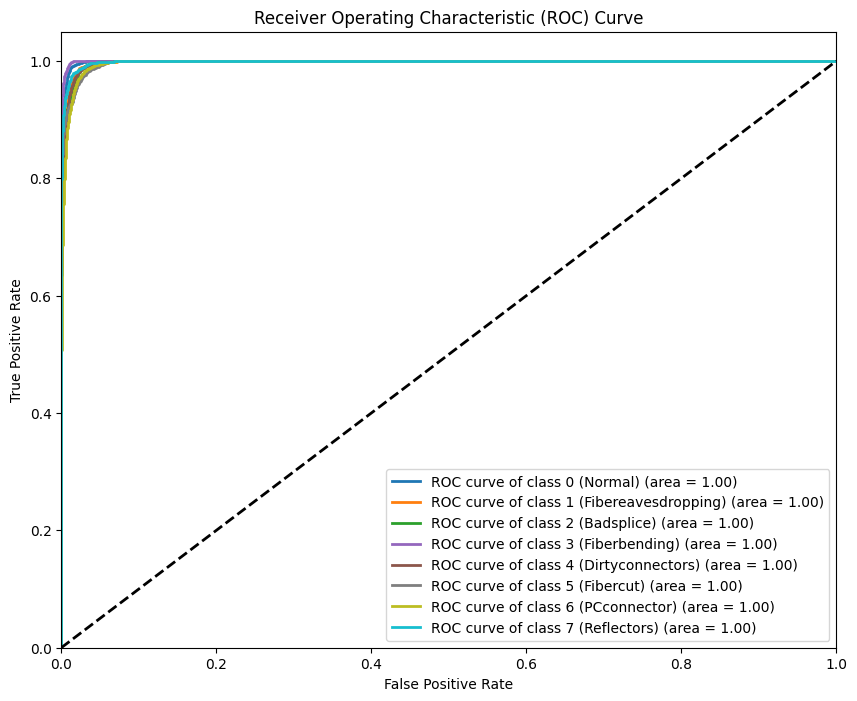

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)


# Get the sorted unique class values from y_test
sorted_classes = sorted(np.unique(y_test))

for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} ({1}) (area = {2:0.2f})'.format(i, class_labels[sorted_classes[i]], roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('/content/drive/MyDrive/OTDR/ROC.pdf', dpi=1000, format='pdf')
plt.show()